In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline

/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
df = pd.read_csv('output.csv')
print(len(df))
df.head()

885548


,Year,Month,State,County,Rate
0,2015,February,Mississippi,Newton County,6.1
1,2015,February,Mississippi,Panola County,9.4
2,2015,February,Mississippi,Monroe County,7.9
3,2015,February,Mississippi,Hinds County,6.1
4,2015,February,Mississippi,Kemper County,10.6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885548 entries, 0 to 885547
Data columns (total 5 columns):
Year      885548 non-null int64
Month     885548 non-null object
State     885548 non-null object
County    885548 non-null object
Rate      885548 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 33.8+ MB


# The .groupby() and .plot() methods

In [4]:
state_avg = df.groupby('State')['Rate'].mean() #Aggregate the data
state_avg = state_avg.sort_values() #Sort the Aggregation
state_avg.head() #Preview the series

State
Nebraska        3.109903
North Dakota    3.848084
South Dakota    4.097629
Kansas          4.178851
Iowa            4.236744
Name: Rate, dtype: float64

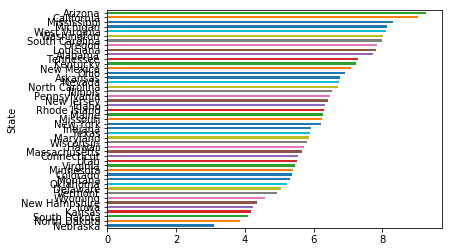

In [5]:
#Create a bar graph from the series
state_avg.plot(kind='barh')

# Controlling Figure Asthetics with plt methods

### Recall that plt is the standard alias for the pyplot submodule of matplotlib 
`import matplotlib.pyplot as plt`

Text(0.5, 0, 'Average Unemployment Rate')

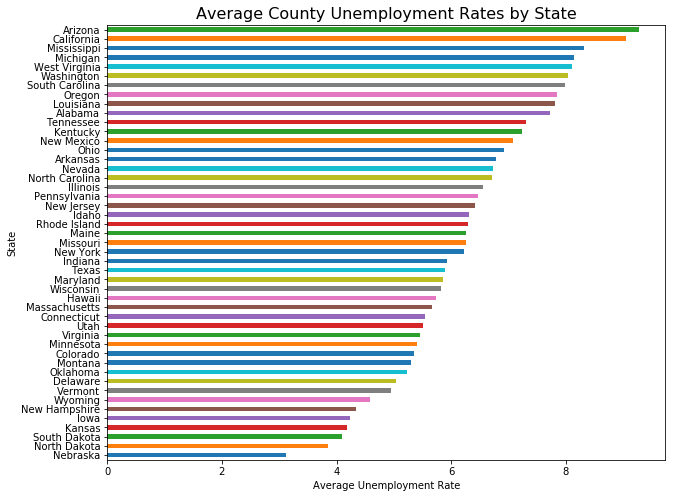

In [6]:
plt.figure(figsize=(10,8)) #Manually creates a figure object and specifies the size (will be useful for subplots later too)
state_avg.plot(kind='barh') #Same Visual code as before
plt.title('Average County Unemployment Rates by State', fontsize=16)
plt.xlabel('Average Unemployment Rate') #Add Axis Label (y already labelled)

# Seaborn
Again seaborn can also improve the asthetics of our visual.

In [7]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [8]:
sns.set_style('darkgrid')

NameError: name 'sns' is not defined

Text(0.5, 0, 'Average Unemployment Rate')

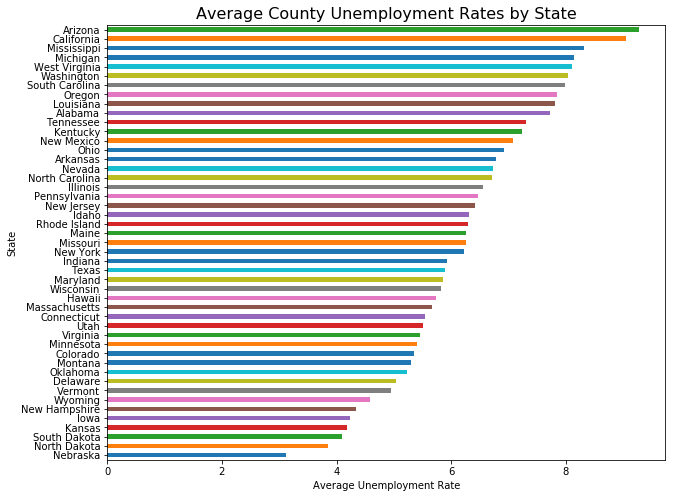

In [9]:
#Same code as above 

plt.figure(figsize=(10,8)) #Manually creates a figure object and specifies the size (will be useful for subplots later too)
state_avg.plot(kind='barh') #Same Visual code as before
plt.title('Average County Unemployment Rates by State', fontsize=16)
plt.xlabel('Average Unemployment Rate') #Add Axis Label (y already labelled)

# Box [and whisker] Plots

In [10]:
ny_rates = df[df.State=='New York'].Rate
print(len(ny_rates), type(ny_rates), ny_rates[:5])

20088 <class 'pandas.core.series.Series'> 2453    6.6
2454    6.9
2455    5.8
2456    8.1
2457    7.4
Name: Rate, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x7f01037c4cc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f01037d0390>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f01037c4b70>],
 'medians': [<matplotlib.lines.Line2D at 0x7f01037d0a20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f01037d0d68>],
 'means': []}

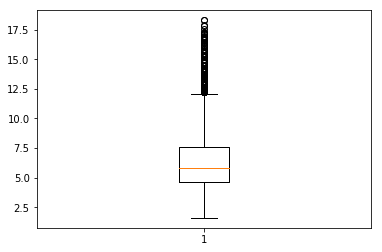

In [11]:
plt.boxplot(list(ny_rates))

# The Rectanbular Box
The rectangular box of the box and whisker plot is bounded by the 25th percentile at the bottom, the 75th percentile at the top and the median, the colored line in the middle.

# The Median 
The median is the middle data point in the data; half of the other data points are above it and half of the data points are below it.

In [12]:
#The center line above (currently orange) is the median.
ny_rates.median()

5.8

# Quartiles and Percentiles
The top and bottom of the middle rectangle surrounding the median are the upper and lower quartiles
These are also known as the 25th percentile and the 75th percentile. They can also be thought of the median of the lower half of the data and the median of the upper half of the data.
    * 25% of the data falls between the minimum and the 25th percentile
    * 25% of the data falls between the 25th percentile and the median
    * 25% of the data falls between the median and the 75th percentile
    * 25% of the data falls between the 75th percentile and the maximum


In [13]:
print('25th percentile:', ny_rates.quantile(q=.25))
print('75th percentile:', ny_rates.quantile(q=.75))

25th percentile: 4.6
75th percentile: 7.6


# Whiskers
The whiskers of the box and whisker plot can be specified in a couple of different manners.  
Here's the notes from the docstring (which is also good practice for reading documentation)!

whis : float, sequence, or string (default = 1.5)

    As a float, determines the reach of the whiskers to the beyond the first and third quartiles. In other words, where IQR is the interquartile range (Q3-Q1), the upper whisker will extend to last datum less than Q3 + whis*IQR). Similarly, the lower whisker will extend to the first datum greater than Q1 - whis*IQR. Beyond the whiskers, data are considered outliers and are plotted as individual points. Set this to an unreasonably high value to force the whiskers to show the min and max values. Alternatively, set this to an ascending sequence of percentile (e.g., [5, 95]) to set the whiskers at specific percentiles of the data. Finally, whis can be the string 'range' to force the whiskers to the min and max of the data.


In [14]:
#Remember you can pull up the full docstring
plt.boxplot?

{'whiskers': [<matplotlib.lines.Line2D at 0x7f01037483c8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0103748a58>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0103748278>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0103750128>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0103750470>],
 'means': []}

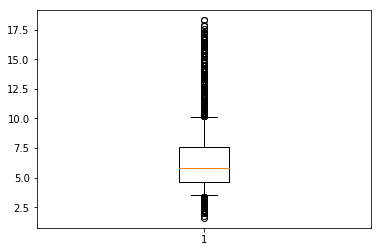

In [15]:
plt.boxplot(list(ny_rates), whis=[5,95]) #Whiskers are now set to 5th and 95th percentile rather then outlier metric

{'whiskers': [<matplotlib.lines.Line2D at 0x7f01037202b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0103720940>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0103720160>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0103720fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f010372b358>],
 'means': []}

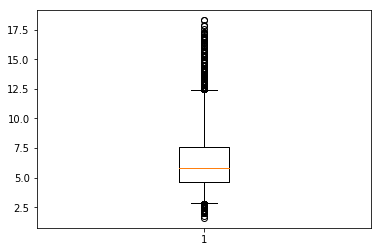

In [16]:
plt.boxplot(list(ny_rates), whis=[1,99]) #Whiskers are now set to 1st and 99th percentile rather then outlier metric

# Removing points above and below the whiskers

{'whiskers': [<matplotlib.lines.Line2D at 0x7f01036fb1d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f01036fb860>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f01036fb080>],
 'medians': [<matplotlib.lines.Line2D at 0x7f01036fbef0>],
 'fliers': [],
 'means': []}

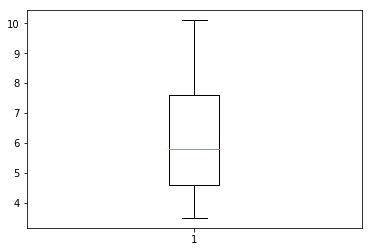

In [17]:
plt.boxplot(list(ny_rates), whis=[5,95], showfliers=False) #Do not display points above/below whiskers

# Some other measures

In [21]:
ny_rates.min()

1.6000000000000001

In [22]:
ny_rates.max()

18.300000000000001

In [23]:
ny_rates.quantile(q=.1)

3.8

In [24]:
ny_rates.quantile(q=.9)

9.1

# Graphing Time Data

In [30]:
ny = df[df.State == 'New York']
ny.head(2)

,Year,Month,State,County,Rate
2453,2015,February,New York,Livingston County,6.6
2454,2015,February,New York,Wayne County,6.9


In [31]:
ny_monthly = ny.groupby(['Year', 'Month'])['Rate'].mean()
ny_monthly.head(2)

Year  Month 
1990  April     5.470968
      August    4.350000
Name: Rate, dtype: float64

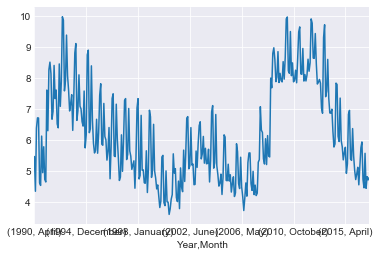

In [32]:
ny_monthly.plot()

# Practice Controlling Figure Asthetics
Use plt methods like .figure(), .title(), and .ylabel() to improve upon the simple time plot shown above.

In [ ]:


plt.figure(figsize=(10,8)) #Manually creates a figure object and specifies the size (will be useful for subplots later too)
ny_monthly.plot() #Same Visual code as before
plt.title('Average County Unemployment Rates by State', fontsize=16)
plt.xlabel('Average Unemployment Rate') #Add Axis Label (y already labelled)


# Your code here